In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving r1.jpg to r1.jpg


In [3]:
from google.colab import files
uploaded = files.upload()

Saving r2.jpg to r2.jpg


In [8]:
img1 = cv.imread('/content/r1.jpg',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/r2.jpg',cv.IMREAD_GRAYSCALE)

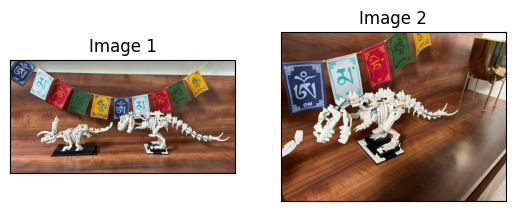

In [17]:
import matplotlib.pyplot as plt
img1_color = cv.imread('/content/r1.jpg', cv.IMREAD_COLOR)
img2_color = cv.imread('/content/r2.jpg', cv.IMREAD_COLOR)

plt.subplot(121), plt.imshow(cv.cvtColor(img1_color, cv.COLOR_BGR2RGB)), plt.title('Image 1')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv.cvtColor(img2_color, cv.COLOR_BGR2RGB)), plt.title('Image 2')
plt.xticks([]), plt.yticks([])
plt.show()


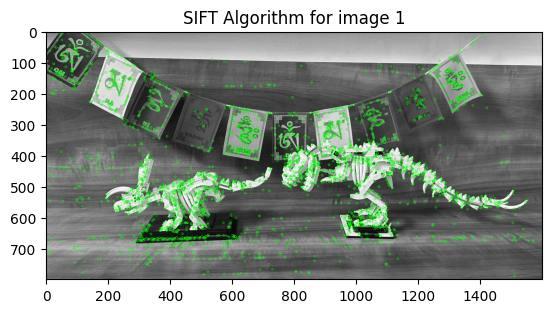

In [9]:
#detector
sift = cv.SIFT_create()
#keypointsSIFT
kp = sift.detect(img1,None)
#descriptors
kp, des = sift.compute(img1, kp)
#orientation
imgResult = cv.drawKeypoints(img1, kp, None, color=(0,255,0), flags=0)
plt.title('SIFT Algorithm for image 1')
plt.imshow(imgResult)
plt.show()

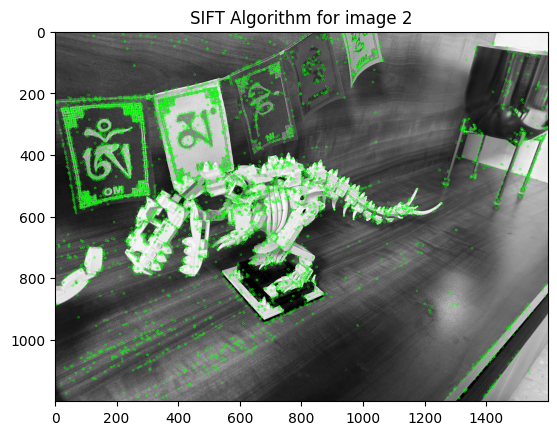

In [10]:
#detector
sift = cv.SIFT_create()
#keypointsSIFT
kp = sift.detect(img2,None)
#descriptors
kp, des = sift.compute(img2, kp)
#orientation
imgResult = cv.drawKeypoints(img2, kp, None, color=(0,255,0), flags=0)
plt.title('SIFT Algorithm for image 2')
plt.imshow(imgResult)
plt.show()

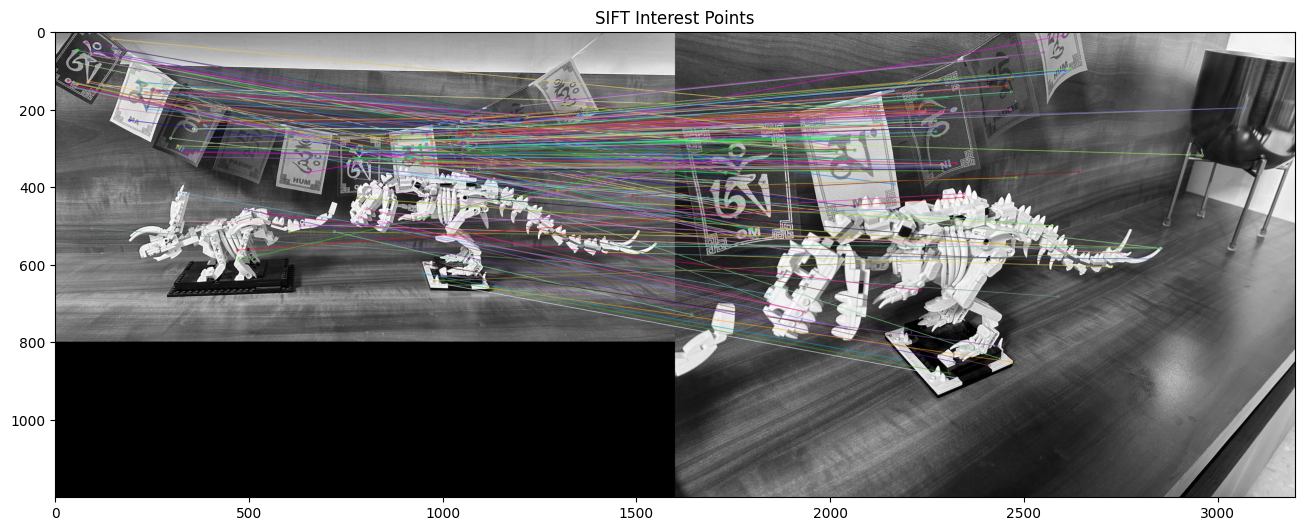

In [11]:
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(16, 16))
plt.title('SIFT Interest Points')
plt.imshow(img3)
plt.show()

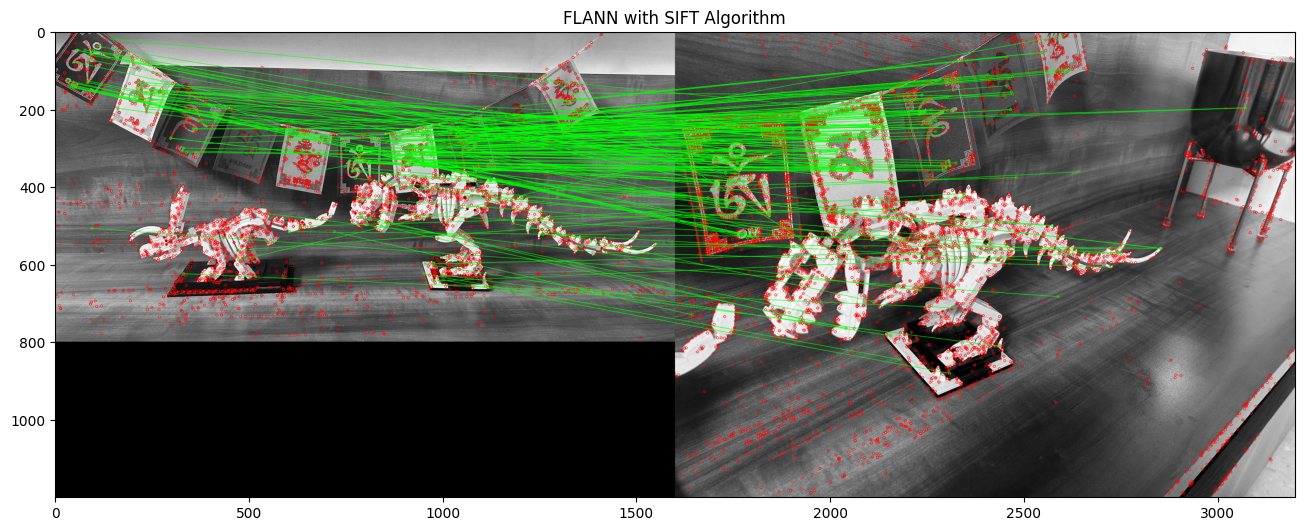

(<matplotlib.image.AxesImage at 0x7aa7a8823090>, None)

In [12]:
# SIFT Algorithm

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0,0] for i in range(len(matches))]

for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
plt.figure(figsize=(16, 16))
plt.title('FLANN with SIFT Algorithm')
plt.imshow(img3,'gray'),plt.show()

In [13]:
MIN_MATCH_COUNT = 10

good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

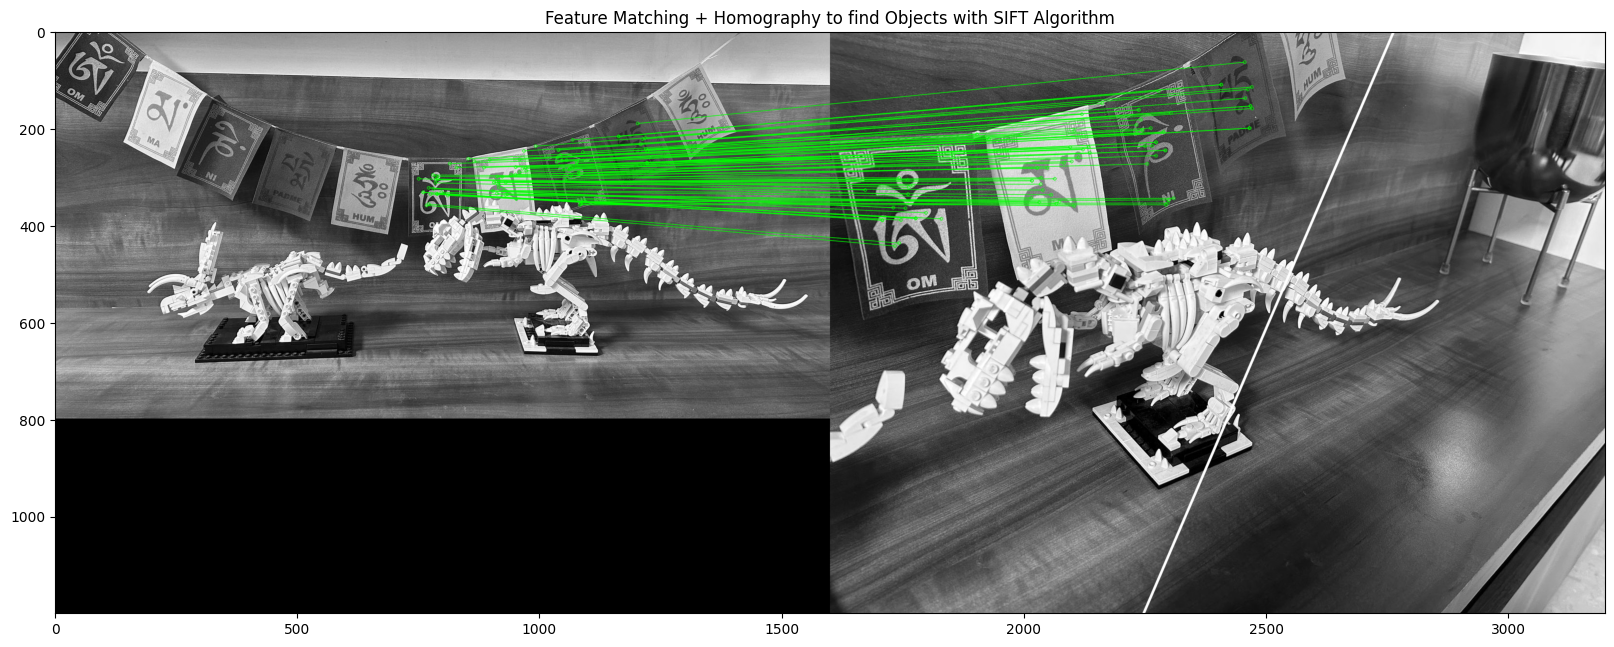

Time:  0.7438733049999655


In [14]:
import timeit

start = timeit.default_timer()

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[h-1,w-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=(20, 20))
plt.title('Feature Matching + Homography to find Objects with SIFT Algorithm')
plt.imshow(img3, 'gray'),plt.show()

stop = timeit.default_timer()
waktu = stop - start
print('Time: ', stop - start)

In [15]:
avg = sum(matchesMask)/len(matchesMask)
round(avg)
persentase = round(avg)*100
from tabulate import tabulate
table = [['Methods','Keypoint 1 - Ori Image', 'Keypoint 2 - 90 degrees', 'Matches', "AVG Matches Rate","Time(sec)"], ["SIFT",len(kp1), len(kp2), len(matchesMask), persentase, waktu]]
print(tabulate(table, headers='firstrow'))

Methods      Keypoint 1 - Ori Image    Keypoint 2 - 90 degrees    Matches    AVG Matches Rate    Time(sec)
---------  ------------------------  -------------------------  ---------  ------------------  -----------
SIFT                           3486                       6226        192                   0     0.743873
